In [16]:
%matplotlib inline
from astropy.io import fits
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=170.136685524))
('tau-weighted centroid in km/s = ', 137.72514893625055)


<CompoundModel115(amplitude_0=0.979050310990685, amplitude_1=0.11752249975492163, mean_1=170.13668552382333, stddev_1=257.37147989950796, amplitude_2=0.11752249975492163, mean_2=668.1366855238233, stddev_2=257.37147989950796)>

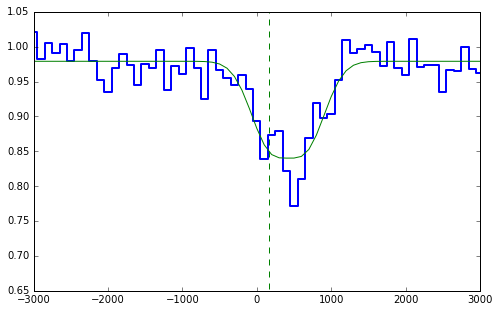

In [64]:
CIV_stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.072,0.15]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final


## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=197.372818898))
('tau-weighted centroid in km/s = ', 362.63477610416635)


<CompoundModel113(amplitude_0=0.9892055824498648, amplitude_1=0.08185271890550624, mean_1=197.37281889809336, stddev_1=208.48362922925318, amplitude_2=0.08185271890550624, mean_2=695.3728188980933, stddev_2=208.48362922925318)>

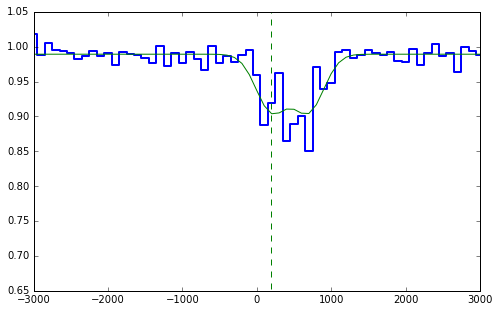

In [63]:
CIV_stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.01,0.069]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# CIV, MgII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=52.8358010568))
('tau-weighted centroid in km/s = ', 145.68795547420268)


<CompoundModel117(amplitude_0=0.9779572209297839, amplitude_1=0.04833726378781018, mean_1=52.835801056761056, stddev_1=362.89720438540326, amplitude_2=0.04833726378781018, mean_2=550.835801056761, stddev_2=362.89720438540326)>

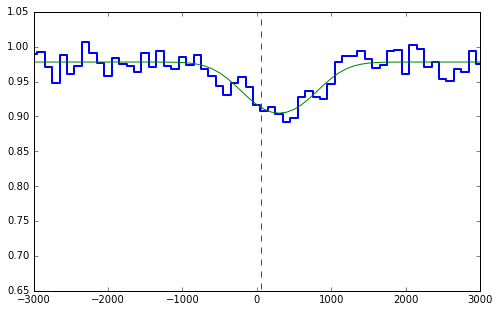

In [65]:
CIV_stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.046/2,0.046]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

('Centroid velocity in km/s = ', Parameter('mean_1', value=181.200274194))
('tau-weighted centroid in km/s = ', 416.02789706206005)


<CompoundModel119(amplitude_0=0.9873193695449851, amplitude_1=0.02350258842507017, mean_1=181.20027419386477, stddev_1=320.1874973689154, amplitude_2=0.02, mean_2=679.2002741938647, stddev_2=320.1874973689154)>

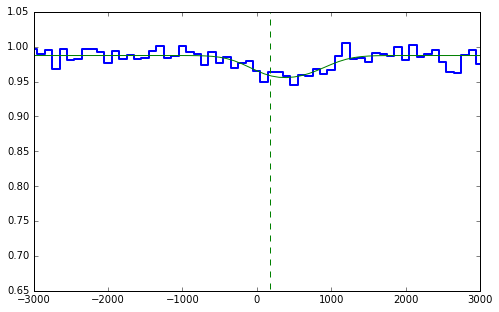

In [66]:
CIV_stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.02/2,0.02]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# CII, OIII stack

In [2]:
# Try what should conti be. Turns out it doesn't matter if I estimate it first or use this as a free parameter. 
# Except if I want to report dispersion in the average absorption. 
# Changing the continuum level changes what pixels to be set to zero. 
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
cranges = [(-3000.,-1300.)*u.km/u.s,(1300.,3000.)*u.km/u.s]
pix = np.where( (velo >= cranges[0][0]) & (velo <= cranges[0][1]) | (velo >= cranges[1][0]) & (velo <= cranges[1][1]))[0]
fit = np.polyfit(velo[pix].value, CII_stack[0].data[pix], 0)
pv = np.poly1d(fit)
conti = pv(velo.value)
conti

array([ 0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246,  0.96787246,  0.96787246,  0.96787246,  0.96787246,
        0.96787246])

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=207.234638353))
('Error in centroid and dispersion = ', 30.726950198594945, 32.945735005569212)
('tau-weighted centroid in km/s = ', 229.93800082678843)


<CompoundModel6(amplitude_0=0.9755633647466384, amplitude_1=0.15401615311893874, mean_1=207.23463835252264, stddev_1=355.39466637914296)>

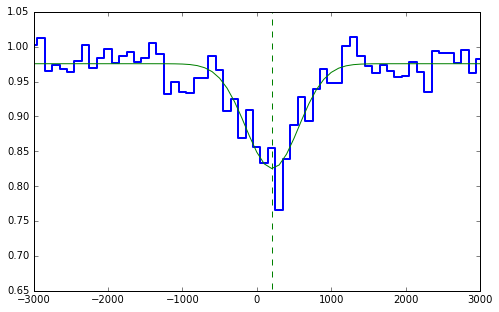

In [7]:
CII_stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
#c_init.amplitude.fixed=True
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=60.381926875))
('Error in centroid and dispersion = ', 48.154690915767773, 51.007814313104966)
('tau-weighted centroid in km/s = ', 138.76356853727805)


<CompoundModel9(amplitude_0=0.9867053879549861, amplitude_1=0.04907516079135056, mean_1=60.38192687498636, stddev_1=307.30935731312303)>

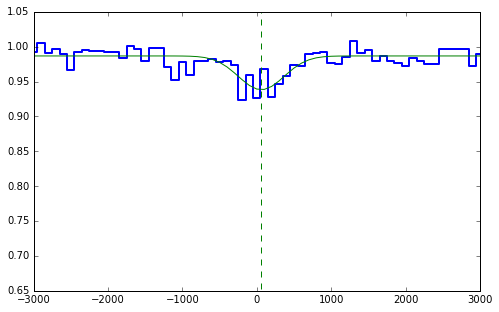

In [10]:
CII_stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
#c_init.amplitude.fixed=True
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# CII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=139.799409145))
('Error in centroid and dispersion = ', 33.757126345307803, 36.852564930198533)
('tau-weighted centroid in km/s = ', 155.94785435850511)


<CompoundModel0(amplitude_0=0.9685919739100455, amplitude_1=0.11287878676805406, mean_1=139.7994091450566, stddev_1=418.95919671238534)>

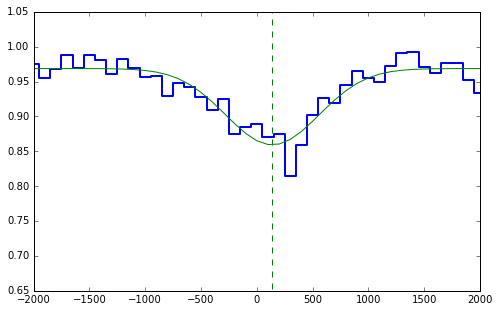

In [3]:
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-2000,2000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=15.9107560497))
('Error in centroid and dispersion = ', 52.675304699626949, 55.870599878048743)
('tau-weighted centroid in km/s = ', 141.74771910305759)


<CompoundModel11(amplitude_0=0.9841776886098659, amplitude_1=0.046802139923610125, mean_1=15.910756049689995, stddev_1=312.8299088646056)>

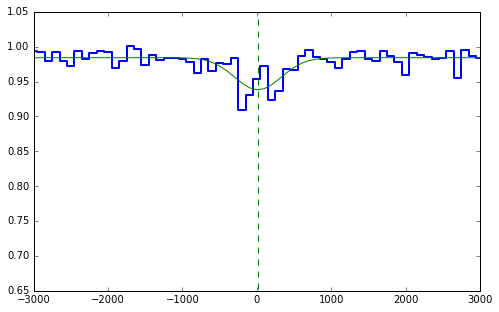

In [12]:
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=249.757829491))
('Error in centroid and dispersion = ', 21.225757073473943, 20.353022185108458)
('tau-weighted centroid in km/s = ', 520.8839445832831)


<CompoundModel19(amplitude_0=0.9208817472899802, amplitude_1=0.25006528554057245, mean_1=249.7578294908512, stddev_1=164.8117695227278, amplitude_2=0.19097985165664216, mean_2=1018.7578294908512, stddev_2=164.8117695227278)>

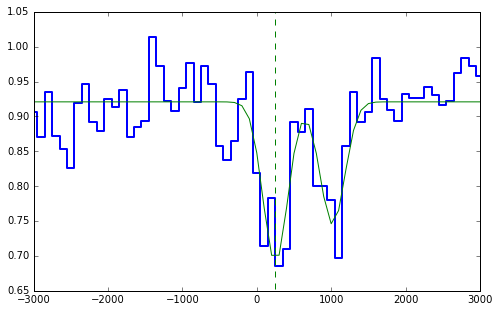

In [18]:
MgII_stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.2732/2,0.2732]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=214.818117475))
('Error in centroid and dispersion = ', 25.176839930931852, 23.801480311997587)
('tau-weighted centroid in km/s = ', 415.39862679099792)


<CompoundModel21(amplitude_0=0.9662358372056384, amplitude_1=0.23406649478892347, mean_1=214.8181174745277, stddev_1=171.7979614572425, amplitude_2=0.12984889944046346, mean_2=983.8181174745278, stddev_2=171.7979614572425)>

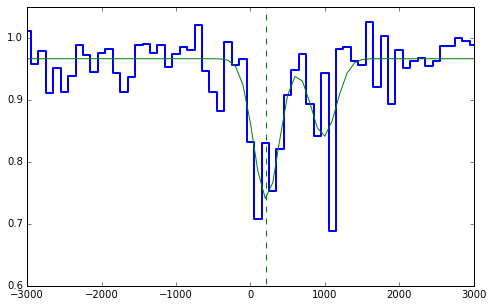

In [19]:
MgII_stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.2383/2,0.2383]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=275.519798909))
('tau-weighted centroid in km/s = ', 769.64437306333434)


<CompoundModel23(amplitude_0=0.9548414436947669, amplitude_1=0.1598178178521188, mean_1=275.5197989086565, stddev_1=239.6759137708311, amplitude_2=0.13583981565378872, mean_2=1044.5197989086564, stddev_2=239.6759137708311)>

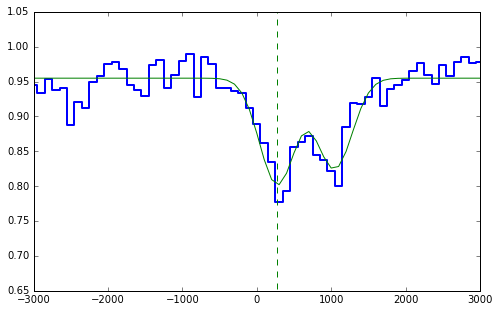

In [20]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.1700/2,0.1700]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=86.3068042537))
('tau-weighted centroid in km/s = ', 899.04730349821614)


<CompoundModel37(amplitude_0=0.9843507930683004, amplitude_1=0.06446827805880098, mean_1=86.30680425370046, stddev_1=201.84694584125023, amplitude_2=0.06446827805880098, mean_2=855.3068042537004, stddev_2=201.84694584125023)>

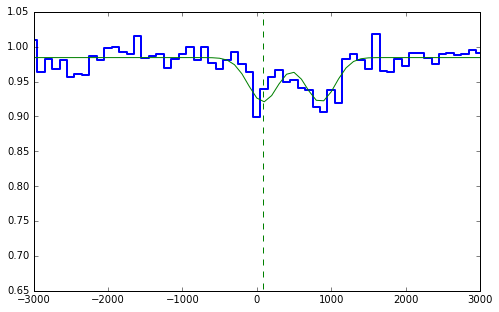

In [27]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*1.
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=78.9708090224))
('tau-weighted centroid in km/s = ', 281.811133548729)


<CompoundModel41(amplitude_0=0.9940629093552142, amplitude_1=0.033113119452540044, mean_1=78.97080902244856, stddev_1=155.24217606313675, amplitude_2=0.032, mean_2=847.9708090224485, stddev_2=155.24217606313675)>

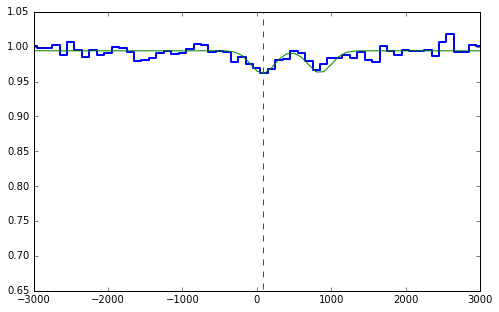

In [29]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.0320/2,0.0320]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=117.9929636))
('tau-weighted centroid in km/s = ', -118.39250259557984)


<CompoundModel45(amplitude_0=1.0001662621002714, amplitude_1=0.01875653714204658, mean_1=117.99296360041356, stddev_1=236.0063245014062, amplitude_2=0.00905, mean_2=886.9929636004135, stddev_2=236.0063245014062)>

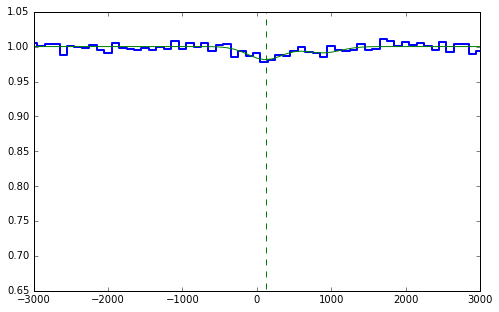

In [31]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.352*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.0181/2,0.181]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
model_final

# CIV foreground quasar stack 

<CompoundModel19(slope_0=1.4078380520515169e-05, intercept_0=0.9642973757406363, amplitude_1=0.05671445288515853, mean_1=-341.6394031981518, stddev_1=169.35705401491063, amplitude_2=0.05328550778134432, mean_2=156.3605968018482, stddev_2=169.35705401491063)>

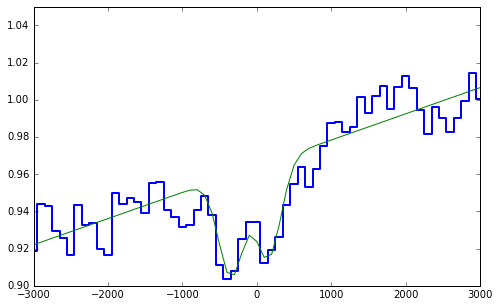

In [15]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.04,mean=-350.,stddev=150.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.04,mean=-350.+498.,stddev=150.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_mean4(model):
    mean_4 = model.mean_3 + 498.
    return mean_4
def tie_stddev4(model):
    stddev_4 = model.stddev_3
    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-3000,3000,0.90,1.05])
model_final
